# Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [106]:
cen_inc = pd.read_csv('census_income.csv')

In [107]:
cen_inc

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [108]:
for i in cen_inc.columns:
    print(i)
    print(cen_inc[i].unique())
    print('-------------'*7)

Age
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
-------------------------------------------------------------------------------------------
Workclass
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
-------------------------------------------------------------------------------------------
Fnlwgt
[ 83311 215646 234721 ...  34066  84661 257302]
-------------------------------------------------------------------------------------------
Education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
-------------------------------------------------------------------------------------------
Education_num
[

## Obsv-:
* since income has two classes either less than 50k or greater than or equal to 50k, this problems lies in classification task.
* the capital loss and capital gain columns is in the range of thousands and we can scale the columns for better accuracy.
* there are '?' mark present in the data which concludes to nan values.
* we can divide education num by 10 to normalize the data or use scaling technique.
* we have to scale the fnlwght column to normalize the column. 
* we can change categories for education column, so as it gonna reduce.
#### the three sets of controls for fnlwght are-:
1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

In [109]:
cen_inc.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [110]:
cen_inc['Workclass'].replace(' ?', np.NAN, inplace = True)

In [141]:
cen_inc['Occupation'].replace(to_replace= ' ?', value=np.NAN, inplace = True)
cen_inc['Native_country'].replace(to_replace= ' ?', value=np.NAN, inplace = True)
# education col manupilation
cen_inc['Education'].replace(to_replace= [' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th'] , value= 'SSC', inplace = True)
cen_inc['Education'].replace(to_replace= [' 11th','12th',' HS-grad'] , value= 'HSC', inplace = True)
cen_inc['Education'].replace(to_replace= [' Some-college',' Bachelors'] , value= 'Graduation',inplace = True)

In [112]:
cen_inc.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<AxesSubplot:>

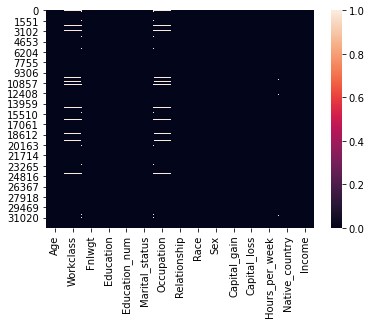

In [113]:
sns.heatmap(cen_inc.isnull())

In [114]:
cen_inc.dropna(inplace = True)

In [115]:
cen_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30161 non-null  int64 
 1   Workclass       30161 non-null  object
 2   Fnlwgt          30161 non-null  int64 
 3   Education       30161 non-null  object
 4   Education_num   30161 non-null  int64 
 5   Marital_status  30161 non-null  object
 6   Occupation      30161 non-null  object
 7   Relationship    30161 non-null  object
 8   Race            30161 non-null  object
 9   Sex             30161 non-null  object
 10  Capital_gain    30161 non-null  int64 
 11  Capital_loss    30161 non-null  int64 
 12  Hours_per_week  30161 non-null  int64 
 13  Native_country  30161 non-null  object
 14  Income          30161 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Visualisation and preprocessing

In [116]:
cen_inc.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [117]:
cen_inc.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076511,0.043525,0.080154,0.060166,0.101599
Fnlwgt,-0.076511,1.000000,-0.044954,0.000427,-0.009757,-0.022889
Education_num,0.043525,-0.044954,1.000000,0.124413,0.079656,0.152528
Capital_gain,0.080154,0.000427,0.124413,1.000000,-0.032228,0.080432
Capital_loss,0.060166,-0.009757,0.079656,-0.032228,1.000000,0.052417
Hours_per_week,0.101599,-0.022889,0.152528,0.080432,0.052417,1.000000


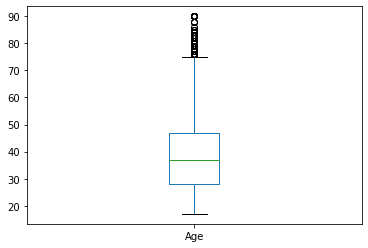

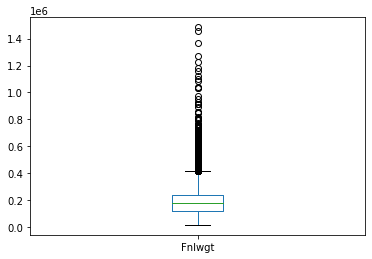

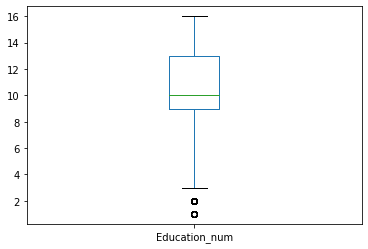

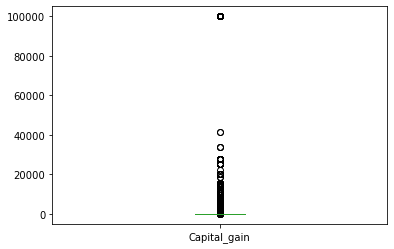

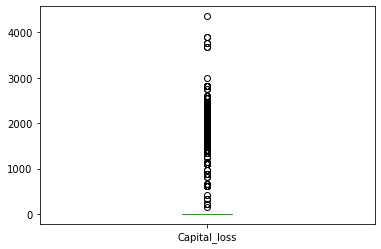

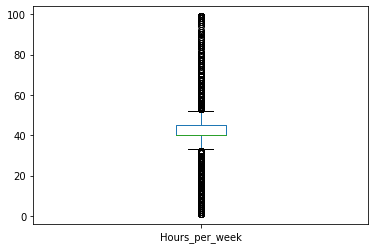

In [24]:
for i in cen_inc[['Age', 'Fnlwgt', 'Education_num','Capital_gain', 'Capital_loss', 'Hours_per_week']]:
    plt.figure()
    cen_inc[i].plot.box()

1. Except ['Age','Education_num'] column we need to treat ['Fnlwgt','Capital_gain', 'Capital_loss', 'Hours_per_week'] these columns with robust scaler as it robust to outliers by masking them, but first we will remove outliers

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
df_scaled = scaler.fit_transform(df)

In [48]:
df_scaled = pd.DataFrame(df_scaled,columns = ['Age','Fnlwgt','Education_num','Capital_gain', 'Capital_loss', 'Hours_per_week'])

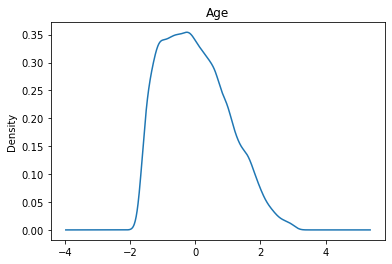

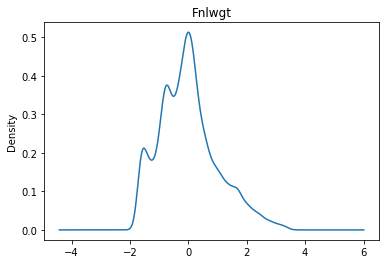

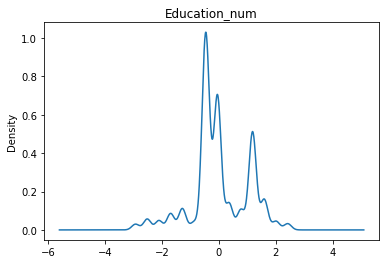

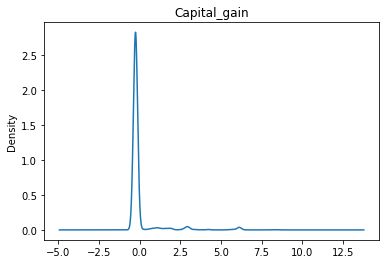

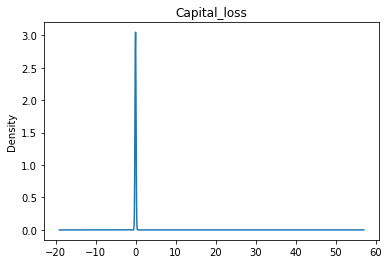

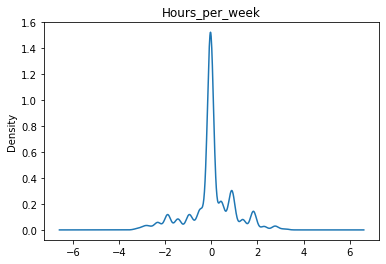

In [54]:
for i in df_scaled.columns:
    plt.figure()
    plt.title(i)
    df_scaled[i].plot.kde()

In [207]:
# data has been scaled properly.

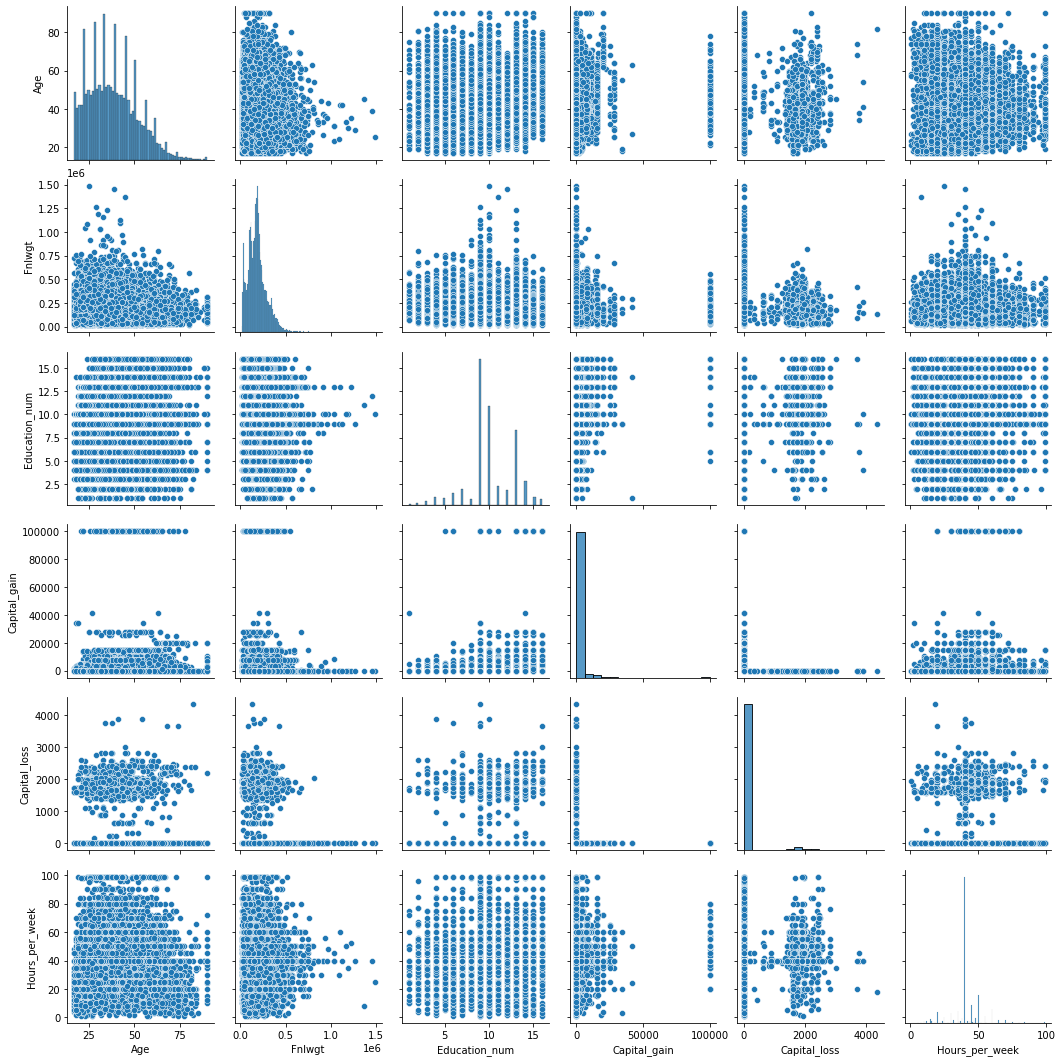

In [55]:
sns.pairplot(cen_inc)

<AxesSubplot:xlabel='Capital_gain', ylabel='Age'>

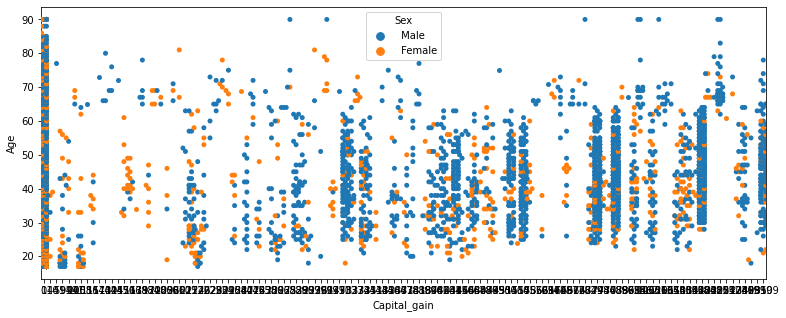

In [74]:
plt.figure(figsize = (13,5))
sns.swarmplot(x = 'Capital_gain', y = 'Age', data = cen_inc, hue = 'Sex')

In [208]:
# there are some outliers at top of the plot where age is 90.

<Figure size 936x360 with 0 Axes>

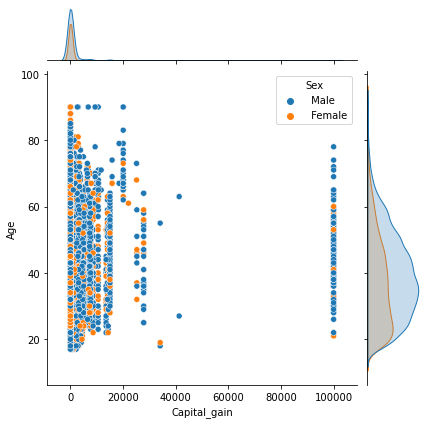

In [77]:
plt.figure(figsize = (13,5))
sns.jointplot(x = 'Capital_gain', y = 'Age', data = cen_inc, hue = 'Sex')

<Figure size 936x360 with 0 Axes>

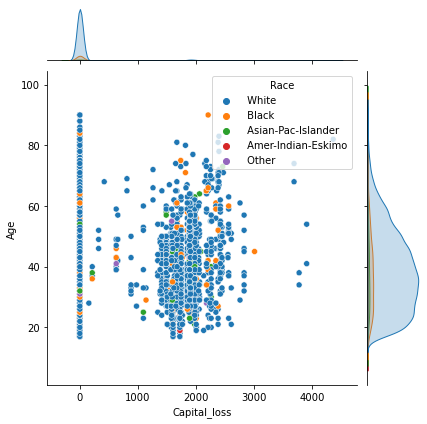

In [78]:
plt.figure(figsize = (13,5))
sns.jointplot(x = 'Capital_loss', y = 'Age', data = cen_inc, hue = 'Race')

<Figure size 936x360 with 0 Axes>

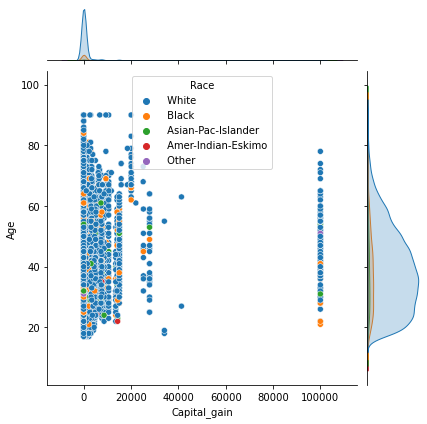

In [79]:
plt.figure(figsize = (13,5))
sns.jointplot(x = 'Capital_gain', y = 'Age', data = cen_inc, hue = 'Race')

<Figure size 936x360 with 0 Axes>

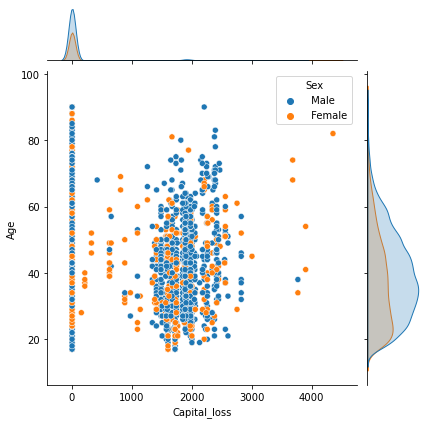

In [76]:
plt.figure(figsize = (13,5))
sns.jointplot(x = 'Capital_loss', y = 'Age', data = cen_inc, hue = 'Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

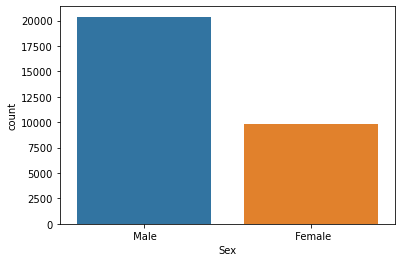

In [57]:
sns.countplot(cen_inc['Sex'])

<AxesSubplot:xlabel='Income', ylabel='count'>

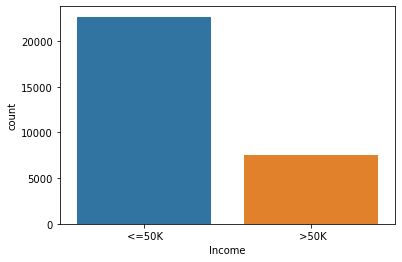

In [58]:
sns.countplot(cen_inc['Income'])

<AxesSubplot:xlabel='Workclass', ylabel='count'>

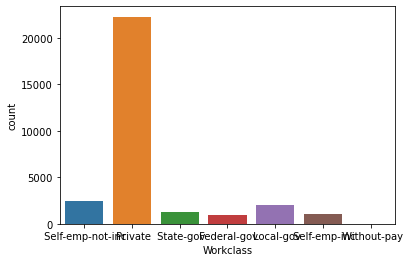

In [59]:
sns.countplot(cen_inc['Workclass'])

<AxesSubplot:xlabel='Race', ylabel='count'>

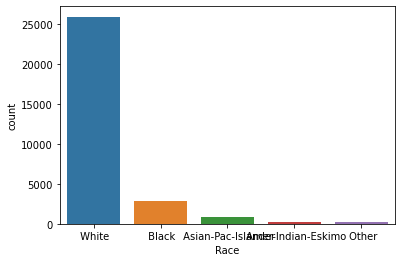

In [60]:
sns.countplot(cen_inc['Race'])

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [121]:
income = le.fit_transform(cen_inc['Income'])
cen_inc['Income'] = income

<AxesSubplot:xlabel='Fnlwgt', ylabel='Hours_per_week'>

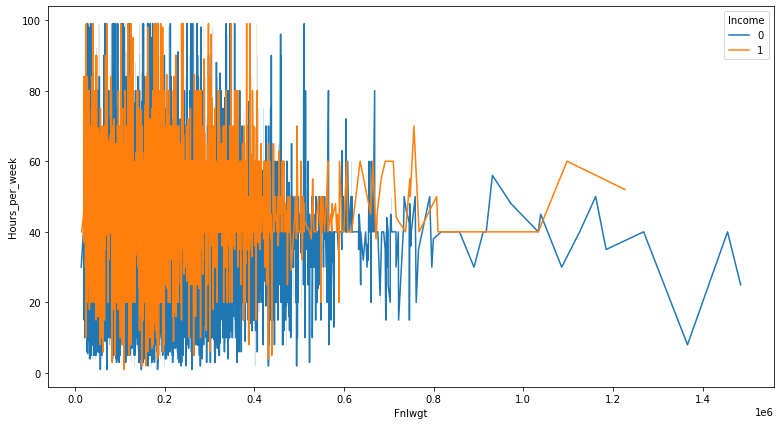

In [80]:
plt.figure(figsize = (13,7))
sns.lineplot(x = 'Fnlwgt', y = 'Hours_per_week', data = cen_inc, hue = 'Income')

#### major part of final weight which lies between 0-0.6 consist of high and low number of hours per week.

# data preprocessing

In [122]:
cen_inc.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,30161.000000,3.016100e+04,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,1.897976e+05,10.121216,1091.971984,88.375419,40.931269,0.248931
std,13.134882,1.056527e+05,2.549983,7406.466659,404.304753,11.980182,0.432401
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176280e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376300e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [123]:
cen_inc.describe(include='O')

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
count,30161,30161,30161,30161,30161,30161,30161,30161
unique,7,10,7,14,6,5,2,41
top,Private,Graduation,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22286,11721,14065,4038,12463,25932,20379,27503


In [124]:
num = cen_inc [['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week','Income']]

In [142]:
obj = cen_inc[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']]

In [126]:
num.isnull().sum()

Age               0
Fnlwgt            0
Education_num     0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Income            0
dtype: int64

In [127]:
obj.isnull().sum()

Workclass         0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Native_country    0
dtype: int64

* no null values are present in either of the dataframe

## removing outliers and scaling data

In [128]:
from scipy.stats import zscore
z = np.abs(zscore(num.drop('Income', axis =1)))
z

array([[0.880275  , 1.00790871, 1.12896095, 0.14743739, 0.21858977,
        2.33149486],
       [0.03333799, 0.24465878, 0.43970277, 0.14743739, 0.21858977,
        0.07773541],
       [1.10867824, 0.42520607, 1.22403463, 0.14743739, 0.21858977,
        0.07773541],
       ...,
       [1.48935032, 0.35861051, 0.43970277, 0.14743739, 0.21858977,
        0.07773541],
       [1.25148865, 0.11067045, 0.43970277, 0.14743739, 0.21858977,
        1.74718685],
       [1.03254383, 0.92880758, 0.43970277, 1.88109386, 0.21858977,
        0.07773541]])

In [129]:
print(np.where(z>3))

(array([    9,    21,    25, ..., 30087, 30117, 30124], dtype=int64), array([5, 4, 5, ..., 5, 1, 3], dtype=int64))


In [130]:
num = num[(z<3).all(axis =1)]

In [132]:
num

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,83311,13,0,0,13,0
1,38,215646,9,0,0,40,0
2,53,234721,7,0,0,40,0
3,28,338409,13,0,0,40,0
4,37,284582,14,0,0,40,0
...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0
32556,40,154374,9,0,0,40,1
32557,58,151910,9,0,0,40,0
32558,22,201490,9,0,0,20,0


In [133]:
num_scaled = scaler.fit_transform(num.drop('Income', axis =1))

In [134]:
num_scaled = pd.DataFrame(num_scaled, columns = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week'])

In [137]:
num_scaled

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.931625,-1.078291,1.186577,-0.247145,-0.037687,-2.544262
1,-0.001969,0.321873,-0.459369,-0.247145,-0.037687,-0.035382
2,1.165023,0.523695,-1.282342,-0.247145,-0.037687,-0.035382
3,-0.779964,1.620760,1.186577,-0.247145,-0.037687,-0.035382
4,-0.079768,1.051247,1.598063,-0.247145,-0.037687,-0.035382
...,...,...,...,...,...,...
27615,-0.857763,0.762612,0.775090,-0.247145,-0.037687,-0.221225
27616,0.153630,-0.326412,-0.459369,-0.247145,-0.037687,-0.035382
27617,1.554021,-0.352482,-0.459369,-0.247145,-0.037687,-0.035382
27618,-1.246761,0.172096,-0.459369,-0.247145,-0.037687,-1.893812


# encoding obj data

In [144]:
obj.describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
count,30161,30161,30161,30161,30161,30161,30161,30161
unique,7,10,7,14,6,5,2,41
top,Private,Graduation,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22286,11721,14065,4038,12463,25932,20379,27503


In [146]:
# we need to drop native country column as it contains 41 countries.

In [148]:
obj.drop('Native_country', axis =1, inplace = True)

In [150]:
workclass = le.fit_transform(obj['Workclass'])
edu = le.fit_transform(obj['Education'])
ms = le.fit_transform(obj['Marital_status'])
occ = le.fit_transform(obj['Occupation'])
rltn = le.fit_transform(obj['Relationship'])
race = le.fit_transform(obj['Race'])
sex = le.fit_transform(obj['Sex'])

obj['Workclass'] = workclass
obj['Education'] = edu
obj['Marital_status'] = ms
obj['Occupation'] = occ
obj['Relationship'] = rltn
obj['Race'] = race
obj['Sex'] = sex

In [172]:
cen_inc_new = pd.concat([num_scaled,obj,num['Income']], axis =1)

In [173]:
cen_inc_new.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Income
0,0.931625,-1.078291,1.186577,-0.247145,-0.037687,-2.544262,4.0,7.0,2.0,3.0,0.0,4.0,1.0,0.0
1,-0.001969,0.321873,-0.459369,-0.247145,-0.037687,-0.035382,2.0,8.0,0.0,5.0,1.0,4.0,1.0,0.0
2,1.165023,0.523695,-1.282342,-0.247145,-0.037687,-0.035382,2.0,8.0,2.0,5.0,0.0,2.0,1.0,0.0
3,-0.779964,1.620760,1.186577,-0.247145,-0.037687,-0.035382,2.0,7.0,2.0,9.0,5.0,2.0,0.0,0.0
4,-0.079768,1.051247,1.598063,-0.247145,-0.037687,-0.035382,2.0,4.0,2.0,3.0,5.0,4.0,0.0,0.0


In [174]:
cen_inc_new.dropna(inplace = True)

In [175]:
X = cen_inc_new.drop('Income', axis =1)
y = cen_inc_new['Income']

In [176]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
27615    0.0
27616    0.0
27617    0.0
27618    1.0
27619    0.0
Name: Income, Length: 23464, dtype: float64

In [177]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [178]:
lr = LogisticRegression()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
etc = ExtraTreeClassifier()
knc = KNeighborsClassifier()
svc = LinearSVC()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [180]:
models = [lr,gnb,dtc,etc,knc,svc,rfc,abc,gbc]
for m in models:
    print(m)
    m.fit(X_train,y_train)
    print(m.score(X_train,y_train))
    pred_m = m.predict(X_test)
    print('Model Report')
    print(confusion_matrix(y_test,pred_m))
    print(classification_report(y_test,pred_m))
    print('\n')

LogisticRegression()
0.7620229007633588
Model Report
[[5822  187]
 [1609  126]]
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.87      6009
         1.0       0.40      0.07      0.12      1735

    accuracy                           0.77      7744
   macro avg       0.59      0.52      0.49      7744
weighted avg       0.70      0.77      0.70      7744



GaussianNB()
0.744529262086514
Model Report
[[4691 1318]
 [ 587 1148]]
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      6009
         1.0       0.47      0.66      0.55      1735

    accuracy                           0.75      7744
   macro avg       0.68      0.72      0.69      7744
weighted avg       0.79      0.75      0.77      7744



DecisionTreeClassifier()
0.9999363867684479
Model Report
[[4998 1011]
 [ 885  850]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      600

#### we selected 4 models which are-: 
   * KNeighbors ----> 0.80
   * ada boost classifier ----> 0.83
   * random forest classifier -----> 0.82
   * gradient boost classifeir ----> 0.83
#### on the basis of accuracy score, good f1 score, good precision, and less errors

In [181]:
for m in models:
    cv = cross_val_score(m,X,y,cv=5)
    print(m)
    print('cv:', cv)
    print('mean cv:', cv.mean())
    print('\n')

LogisticRegression()
cv: [0.76219902 0.76518219 0.76198594 0.76454294 0.76491901]
mean cv: 0.763765817984704


GaussianNB()
cv: [0.73023652 0.73321969 0.72853186 0.72490944 0.72676897]
mean cv: 0.7287332950764311


DecisionTreeClassifier()
cv: [0.75900277 0.75900277 0.75452802 0.75282335 0.76598465]
mean cv: 0.7582683138570097


ExtraTreeClassifier()
cv: [0.75815044 0.75431494 0.75644577 0.7560196  0.76086957]
mean cv: 0.7571600626279658


KNeighborsClassifier()
cv: [0.79458768 0.79735777 0.7969316  0.80161943 0.8101023 ]
mean cv: 0.8001197571831149


LinearSVC()
cv: [0.76454294 0.76582144 0.7624121  0.7649691  0.76747656]
mean cv: 0.7650444268721858


RandomForestClassifier()
cv: [0.80545493 0.81376518 0.81802685 0.81845302 0.82331628]
mean cv: 0.8158032523453244


AdaBoostClassifier()
cv: [0.81909227 0.82569785 0.83187726 0.83081185 0.84015345]
mean cv: 0.8295265354124307


GradientBoostingClassifier()
cv: [0.81973152 0.82782868 0.82995951 0.83549968 0.83759591]
mean cv: 0.8301230597

### we checked out cross-validation score for all models and for four models which we selected and they perform the best in cv also
now we will check the RANDOMIZED SEARCH CV as the datset is huge and grid search cv will be very time consuming.

In [192]:
knc_param = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors': [2,5],
    'weights': ['uniform', 'distance']    
}

abc_param = {
    'n_estimators': [50,100,150],
    'algorithm': ['SAMME', 'SAMME.R']    
}

rfc_param = {
    'n_estimators': [100,300,500],
    'criterion': ['gini','entropy'],
    'min_samples_split': [2,3,4,5],
    'verbose': [1,10,100,200]
}

gbc_param = {
    'criterion': ['friedman_mse','mse','mae'],
    'max_depth': [1,5,8,10]
}

In [188]:
rdsr = RandomizedSearchCV(estimator=knc, param_distributions=knc_param)
rdsr.fit(X_train,y_train)
print(rdsr.best_params_)
print(rdsr.best_score_)

{'weights': 'uniform', 'n_neighbors': 5, 'algorithm': 'ball_tree'}
0.7954198473282442


In [189]:
rdsr = RandomizedSearchCV(estimator=abc, param_distributions=abc_param)
rdsr.fit(X_train,y_train)
print(rdsr.best_params_)
print(rdsr.best_score_)

{'n_estimators': 150, 'algorithm': 'SAMME.R'}
0.8266539440203562


rdsr = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_param)
rdsr.fit(X_train,y_train)
print(rdsr.best_params_)
print(rdsr.best_score_)

Output-:

{'verbose': 100, 'n_estimators': 100, 'min_samples_split': 5, 'criterion': 'entropy'}
0.8169847328244275

In [204]:
rfc2 = RandomForestClassifier(n_estimators=100, min_samples_split=5, criterion='entropy', verbose=100)
rfc2.fit(X_train,y_train)
pred_rfc2 = rfc2.predict(X_test)
print(confusion_matrix(y_test,pred_rfc2))
print(classification_report(y_test,pred_rfc2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 100
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 100
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 100
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 100
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
building tree 5 of 100
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
building tree 6 of 100
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
building tree 7 of 100
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
building tree 8 of 100
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
building tree 9 of 100
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining: 

[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:    3.0s remaining:    0.0s
building tree 84 of 100
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.1s remaining:    0.0s
building tree 85 of 100
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    3.1s remaining:    0.0s
building tree 86 of 100
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:    3.1s remaining:    0.0s
building tree 87 of 100
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    3.2s remaining:    0.0s
building tree 88 of 100
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:    3.2s remaining:    0.0s
building tree 89 of 100
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:    3.3s remaining:    0.0s
building tree 90 of 100
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.3s remaining:    0.0s
building tree 91 of 100
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    3.4s remaining:    0.0s
building tree 92 of 100
[Parallel(n_jobs=1)]: Done  92 out of  92 | elapsed:    3.4s rem

 [ 853  882]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      6009
         1.0       0.63      0.51      0.56      1735

    accuracy                           0.82      7744
   macro avg       0.75      0.71      0.73      7744
weighted avg       0.81      0.82      0.82      7744



In [195]:
gbc2 = GradientBoostingClassifier(loss='deviance', criterion= 'friedman_mse', max_depth= 10)
gbc2.fit(X_train,y_train)
gbc2.score(X_train,y_train)

0.974618320610687

In [196]:
pred_gbc2 = gbc2.predict(X_test)
print(confusion_matrix(y_test, pred_gbc2))
print(classification_report(y_test, pred_gbc2))

[[5450  559]
 [ 845  890]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      6009
         1.0       0.61      0.51      0.56      1735

    accuracy                           0.82      7744
   macro avg       0.74      0.71      0.72      7744
weighted avg       0.81      0.82      0.81      7744



In [197]:
gbc2 = GradientBoostingClassifier(loss='exponential', criterion= 'mse', max_depth= 8)
gbc2.fit(X_train,y_train)
gbc2.score(X_train,y_train)
pred_gbc2 = gbc2.predict(X_test)
print(confusion_matrix(y_test, pred_gbc2))
print(classification_report(y_test, pred_gbc2))

[[5487  522]
 [ 821  914]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      6009
         1.0       0.64      0.53      0.58      1735

    accuracy                           0.83      7744
   macro avg       0.75      0.72      0.73      7744
weighted avg       0.82      0.83      0.82      7744



In [199]:
abc2 = AdaBoostClassifier(n_estimators=150, algorithm='SAMME.R')
abc2.fit(X_train,y_train)
pred_abc2 = abc2.predict(X_test)
print(confusion_matrix(y_test,pred_abc2))
print(classification_report(y_test, pred_abc2))

[[5485  524]
 [ 782  953]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      6009
         1.0       0.65      0.55      0.59      1735

    accuracy                           0.83      7744
   macro avg       0.76      0.73      0.74      7744
weighted avg       0.82      0.83      0.83      7744



In [200]:
knc2 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='ball_tree')
knc2.fit(X_train,y_train)
pred_knc2 = knc2.predict(X_test)
print(confusion_matrix(y_test,pred_knc2))
print(classification_report(y_test, pred_knc2))

[[5349  660]
 [ 859  876]]
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      6009
         1.0       0.57      0.50      0.54      1735

    accuracy                           0.80      7744
   macro avg       0.72      0.70      0.71      7744
weighted avg       0.80      0.80      0.80      7744



In [202]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba_abc = abc.predict_proba(X_test)[:,1]

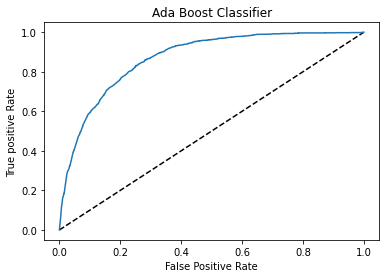

0.7264377209402035


In [203]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba_abc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Ada Boost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Ada Boost Classifier')
plt.show()

auc_score = roc_auc_score(y_test,abc.predict(X_test))
print(auc_score)

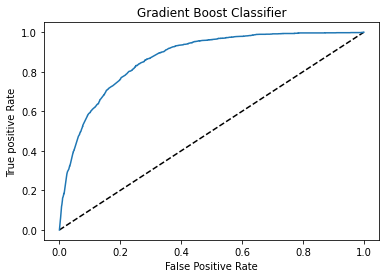

0.7312617529037855


In [205]:
y_pred_proba_gbc = abc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba_gbc)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Gradient Boost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Gradient Boost Classifier')
plt.show()

auc_score = roc_auc_score(y_test,gbc.predict(X_test))
print(auc_score)

### we are getting high errors in most of the model and the minimum error and better metrics result in gradient boost classifier with normal parameters.

# saving the best model

In [206]:
import joblib
joblib.dump(gbc, 'gbcfile.obj')

['gbcfile.obj']

# ------------------------------------------------ END -------------------------------------------------------